<a href="https://colab.research.google.com/github/david-siqi-liu/cs684-final-project/blob/master/cs684_project_DANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminary Results

Naive, Pre-trained model, transfer learning:

label : 10, epochs : 2, accu : 82.9% / 82.2% / 82.2%

Transformations:

Test: none
Train (one at a time)  

Center-crop

	transforms.Resize([200, 200]
	transforms.CenterCrop(50)  33% / 38% / 29%

	transforms.Resize([200, 200]
	transforms.CenterCrop(100) 67% / 70% / 65%

	transforms.Resize([200, 200]
	transforms.CenterCrop(150) 80% / 87% / 79%
	
	transforms.CenterCrop(50)  41.03% / 17.77% / 29%
	transforms.Resize([200, 200]

	transforms.CenterCrop(100)  61.86% / 38.01% / 48.58%
	transforms.Resize([200, 200]

	transforms.CenterCrop(150)  75.60% / 53.31% / 57.62%
	transforms.Resize([200, 200]

Random-crop

	transforms.Resize([200, 200]
	transforms.RandomCrop(50)  53% / 26% / 27%

	transforms.Resize([200, 200]
	transforms.RandomCrop(100) 76% / 68% / 74%

	transforms.Resize([200, 200]
	transforms.RandomCrop(150) 82% / 81% / 81%

Horizontal flips

	transforms.RandomHorizontalFlip(p=0.5)	77.31% / 81.97% / 86.98%

Random rotation

	transforms.RandomRotation(5)	89%	/ 87.93% / 88.25

	transforms.RandomRotation(10)	81.30% / 83.28% / 78.30%

Horizontal&Vertical shifts
	
	transforms.RandomAffine(0, translate=(0.05,0.05))  84.37% / 85.75% / 91.37%

	transforms.RandomAffine(0, translate=(0.1,0.1))	76.86% / 88.27% / 78.57%	

Color Jitter
	
	transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1)	81.77% / 94.08% / 87.11%

	transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2)	86.71% / 90.83% / 84.78%

RandomAffineTransformation

	transforms.RandomAffine(5, shear=10, scale=(0.8, 1.2))	77.41% / 87.04% / 82.25%

domain Comparison

in case of domain comparison, I changed 'learning epochs' as 6 instead of 2 

source = ['quickdraw']

target = ['clipart']

33.65% / 31.35% / 33.05%

-------------------------
source = ['real']

target = ['clipart']

77.23% / 70.52% / 77.39%

-------------------------

source = ['sketch']

target = ['clipart']

76.76% / 75.0% / 82.99%

-------------------------


source = ['quickdraw', 'real']

target = ['clipart']

84.41% / 63.90% / 71.75%

-------------------------

source = ['quickdraw', 'sketch']

target = ['clipart']

78.81% / 70.20% / 71.34%

-------------------------

source = ['real', 'sketch']

target = ['clipart']

85.94% / 85.64% / 86.72%

-------------------------


50 labels

basic : 73.54% / 71.61% / 71.26%

-------------------------

source = ['quickdraw','real', 'sketch']
target = ['clipart']
transforms.RandomRotation(5),
transforms.RandomAffine(0, translate=(0.05,0.05)),
transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),

10 labels : 83.37% / 78.93% / 74.21% 

-------------------------

source = ['real', 'sketch']
target = ['clipart']
transforms.RandomRotation(5),
transforms.RandomAffine(0, translate=(0.05,0.05)),
transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),

10 labels : 89.87% / 80.49% / 75.33% / 83.73% 

-------------------------

50 labels : 70.64% 

-------------------------










# Download Data

In [0]:
!rm -rf sample_data

In [0]:
from urllib.request import urlretrieve
import os
from zipfile import ZipFile

def download(url, file):
    if not os.path.isfile(file):
        urlretrieve(url, file)

#If the downloaded file is a zip file than you can use below function to unzip it.
def uncompress_features_labels(source, file, dest):
    if not os.path.isdir(file):
        with ZipFile(source) as zipf:
            zipf.extractall(dest)

'clipart.zip', 'infograph.zip', 'quickdraw.zip', 'real.zip', 'sketch.zip'

In [3]:
# Source images
for file in ['infograph.zip', 'quickdraw.zip', 'real.zip', 'sketch.zip']:
  download('http://csr.bu.edu/ftp/visda/2019/multi-source/' + file,
           file)
  print("Downloaded: {0}".format(file))
  uncompress_features_labels(file,
                             'data/' + file.split('.zip')[0],
                             'data/')
  print("Extracted: {0}".format(file))

Downloaded: infograph.zip
Extracted: infograph.zip
Downloaded: quickdraw.zip
Extracted: quickdraw.zip
Downloaded: real.zip
Extracted: real.zip
Downloaded: sketch.zip
Extracted: sketch.zip


In [4]:
# Target images (labelled)
download('http://csr.bu.edu/ftp/visda/2019/multi-source/groundtruth/clipart.zip', 'clipart.zip')
print("Downloaded: clipart.zip")
uncompress_features_labels('clipart.zip', 'data/clipart', 'data/')
print("Extracted: clipart.zip")

Downloaded: clipart.zip
Extracted: clipart.zip


In [5]:
!mkdir label

mkdir: cannot create directory ‘label’: File exists


In [0]:
# Source labels
for file in ['infograph', 'quickdraw', 'real', 'sketch']:
  download('http://csr.bu.edu/ftp/visda/2019/multi-source/txt/' + file + '_train.txt',
           'label/' + file + '_train.txt')
  download('http://csr.bu.edu/ftp/visda/2019/multi-source/txt/' + file + '_test.txt',
           'label/' + file + '_test.txt')

In [0]:
# Target labels (groundtruth)
# For the training set, we will NOT look at their labels, so it's still unsupervised
download('http://csr.bu.edu/ftp/visda/2019/multi-source/groundtruth/txt/clipart_train.txt',
           'label/clipart_train.txt')
download('http://csr.bu.edu/ftp/visda/2019/multi-source/groundtruth/txt/clipart_test.txt',
           'label/clipart_test.txt')

# Import Packages

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from torch.autograd import Function
from PIL import Image, ImageColor
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torchvision.models as models

In [0]:
USE_GPU = True

# Load Images and Labels

In total there are 345 labels. For this project, we'll downsize this to only 10 labels. For simplicity, we'll use the first 10.

In [10]:
num_labels = 20

# Seed
manual_seed = 647
random.seed(manual_seed)
torch.manual_seed(manual_seed)

# Randomly select labels
selected_original_labels = random.sample(range(344), num_labels)
selected_original_labels.sort()

print("Selected labels: {0}".format(selected_original_labels))

# Create label mapping
label_to_original_mapping = {}
for i in range(0, num_labels):
  label_to_original_mapping[i] = selected_original_labels[i]
  
original_to_label_mapping = {v : k for k, v in label_to_original_mapping.items()}
print("Original to label mapping: {0}".format(original_to_label_mapping))
print("Label to original mapping: {0}".format(label_to_original_mapping))

# Find English term in target test file (since it's the smallest to load)
original_to_english_mapping = {}
for line in open("label/clipart_test.txt"):
  d = line.strip().split(' ')
  l = int(d[1])
  original_to_english_mapping[l] = d[0].split("/")[1]
  
print("Original to English mapping: {0}".format(original_to_english_mapping))

# Final label mapping
labels = {}
for i in range(0, num_labels):
  labels[i] = original_to_english_mapping[label_to_original_mapping[i]]

print("Labels: {0}".format(labels))

Selected labels: [21, 35, 48, 112, 115, 126, 132, 148, 169, 176, 177, 195, 220, 227, 245, 276, 314, 320, 332, 337]
Original to label mapping: {21: 0, 35: 1, 48: 2, 112: 3, 115: 4, 126: 5, 132: 6, 148: 7, 169: 8, 176: 9, 177: 10, 195: 11, 220: 12, 227: 13, 245: 14, 276: 15, 314: 16, 320: 17, 332: 18, 337: 19}
Label to original mapping: {0: 21, 1: 35, 2: 48, 3: 112, 4: 115, 5: 126, 6: 132, 7: 148, 8: 169, 9: 176, 10: 177, 11: 195, 12: 220, 13: 227, 14: 245, 15: 276, 16: 314, 17: 320, 18: 332, 19: 337}
Original to English mapping: {0: 'aircraft_carrier', 1: 'airplane', 2: 'alarm_clock', 3: 'ambulance', 4: 'angel', 5: 'animal_migration', 6: 'ant', 7: 'anvil', 8: 'apple', 9: 'arm', 10: 'asparagus', 11: 'axe', 12: 'backpack', 13: 'banana', 14: 'bandage', 15: 'barn', 16: 'baseball', 17: 'baseball_bat', 18: 'basket', 19: 'basketball', 20: 'bat', 21: 'bathtub', 22: 'beach', 23: 'bear', 24: 'beard', 25: 'bed', 26: 'bee', 27: 'belt', 28: 'bench', 29: 'bicycle', 30: 'binoculars', 31: 'bird', 32: '

In [0]:
###### LIST LOADER #######

def default_loader(path):
    """Default loader
    """
    return Image.open(path).convert('RGB')

def collect_images(img_dir, labels):
  """Return a list of (image path, label)

  Parameters:
  img_dir (String) : the directory containing the images
  labels (List[String]) : a list of labels (merged multiple sources together)

  Returns:
  List[(String, String)]
  """
  images = []
  indices = {}
  pos = 0
  for line in labels:
    data = line.strip().split(' ')
    path = os.path.join(img_dir, data[0])
    original_label = int(data[1])
    domain = int(data[2])
    # Among the labels selected
    if original_label in selected_original_labels:
      label = original_to_label_mapping[original_label]
      item = (path, label, domain)
      images.append(item)
      if label not in indices.keys():
        indices[label] = [pos]
      else:
        indices[label].append(pos)
      pos += 1
  return images, indices

class MyDataset(data.Dataset):
    """ Custom class for loading image list
    """
    def __init__(self, img_dir, labels, transform=None, loader=default_loader):
        imgs, indices = collect_images(img_dir, labels)
        self.img_dir = img_dir
        self.imgs = imgs
        self.indices = indices
        self.num_imgs = len(imgs)
        self.transform = transform
        self.loader = loader

    def __getitem__(self, index):
        path, label, domain = self.imgs[index]
        img = self.loader(path)

        if self.transform is not None:
            img = self.transform(img)
            
        return img, label, domain

    def __len__(self):
        return len(self.imgs)

    def get_random_sample_index(self, label, n=1):
      return np.random.choice(self.indices[label], n)[0]

In [0]:
###### IMAGE LOADER #######

batch_size_train = 56
batch_size_test = 24

def make_data_set(img_dir, label_dir, domain_list, transforms, source_or_target, train_or_test):
  labels = []
  if (source_or_target == 'source'):
    for d in range(len(domain_list)):
      # E.g. "label/infograph_test.txt"
      label_file = label_dir + domain_list[d] + '_' + train_or_test + '.txt'
      for line in open(label_file):
        # Space delimited
        # Source domain starts at 1
        labels.append(line + " {0}".format(d + 1))
  else:
    # E.g. "label/clipart_test.txt"
    label_file = label_dir + domain_list[0] + '_' + train_or_test + '.txt'
    for line in open(label_file):
        # Space delimited
        # Target domain is always 0
        labels.append(line + " 0")
  return MyDataset(img_dir, labels, transforms)

def make_data_loader(dataset, train_or_test):
  if (train_or_test == 'train'):
    return data.DataLoader(dataset, batch_size=batch_size_train,
                           shuffle=True, num_workers=4)
  else:
    return data.DataLoader(dataset, batch_size=batch_size_test,
                           shuffle=True, num_workers=4)

# Helper Functions

In [0]:
norm = ([0.485, 0.456, 0.406],
        [0.229, 0.224, 0.225])

def tensor_to_PIL(img, mean, std):
  img = img.numpy().transpose((1, 2, 0))
  img = img * std + mean
  img = np.clip(img, 0, 1)
  return img

# Model Evaluation Metrics

In [0]:
def confusion_matrix(preds, targets, conf_matrix):
    preds = torch.argmax(preds, 1)
    for p, t in zip(preds, targets):
        conf_matrix[p, t] += 1

In [0]:
def validate(val_loader, net, vis=True):
  
    conf_matrix = torch.zeros(num_labels, num_labels)
    net.eval()
    val_loss = 0
    correct = 0
    
    with torch.no_grad():
        for i, data in enumerate(val_loader):
            
            inputs, target, domain = data

            if USE_GPU:
                inputs = inputs.cuda()
                target = target.cuda()
                domain = domain.cuda()
                net = net.cuda()

            output = net(inputs)[0]

            val_loss += F.nll_loss(output, target, reduction='mean').item()

            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            
            confusion_matrix(output, target, conf_matrix)
    
    val_loss /= len(val_loader.dataset)

    if vis:
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            val_loss, correct, len(val_loader.dataset),
           # float((num_labels ** 2) * correct / len(val_loader.dataset))))
            100. * correct / len(val_loader.dataset)))
        plt.title('Confusion Matrix')
        plt.imshow(conf_matrix, cmap='viridis', interpolation='nearest')
        plt.colorbar()
        plt.xticks(np.arange(num_labels), labels.values(), rotation='vertical')
        plt.yticks(np.arange(num_labels), labels.values())
        plt.show()
        
    net.train()
    return correct / len(val_loader.dataset)

# Data Loaders

In [0]:
home_dir = ''
img_dir = home_dir + 'data/'
label_dir = home_dir + 'label/'

source = ['real', 'sketch'] # ['quickdraw', 'real', 'sketch']
target = ['clipart']
num_source_domains = len(source)

img_size = 224

In [0]:
source_train_transforms = transforms.Compose([transforms.Resize([img_size, img_size]),
                                              transforms.ToTensor(),
                                              transforms.Normalize(*norm)])

source_test_transforms = transforms.Compose([transforms.Resize([img_size, img_size]),
                                             transforms.ToTensor(),
                                             transforms.Normalize(*norm)])

target_train_transforms = transforms.Compose([transforms.Resize([img_size, img_size]),
                                              transforms.ToTensor(),
                                              transforms.Normalize(*norm)])

target_test_transforms = transforms.Compose([transforms.Resize([img_size, img_size]),
                                             transforms.ToTensor(),
                                             transforms.Normalize(*norm)])

In [0]:
source_train_dataset = make_data_set(img_dir, label_dir, source, source_train_transforms, 'source', 'train')
source_train_dataloader = make_data_loader(source_train_dataset, 'train')

source_test_dataset = make_data_set(img_dir, label_dir, source, source_test_transforms, 'source', 'test')
source_test_dataloader = make_data_loader(source_test_dataset, 'test')

target_train_dataset = make_data_set(img_dir, label_dir, target, target_train_transforms, 'target', 'train')
target_train_dataloader = make_data_loader(target_train_dataset, 'train')

target_test_dataset = make_data_set(img_dir, label_dir, target, target_test_transforms, 'target', 'test')
target_test_dataloader = make_data_loader(target_test_dataset, 'test')

In [19]:
print("Source train dataset size: {0}".format(len(source_train_dataset)))
print("Source test dataset size: {0}".format(len(source_test_dataset)))
print("Target train dataset size: {0}".format(len(target_train_dataset)))
print("Target test dataset size: {0}".format(len(target_test_dataset)))

Source train dataset size: 10938
Source test dataset size: 4714
Target train dataset size: 1825
Target test dataset size: 795


# Sample Images

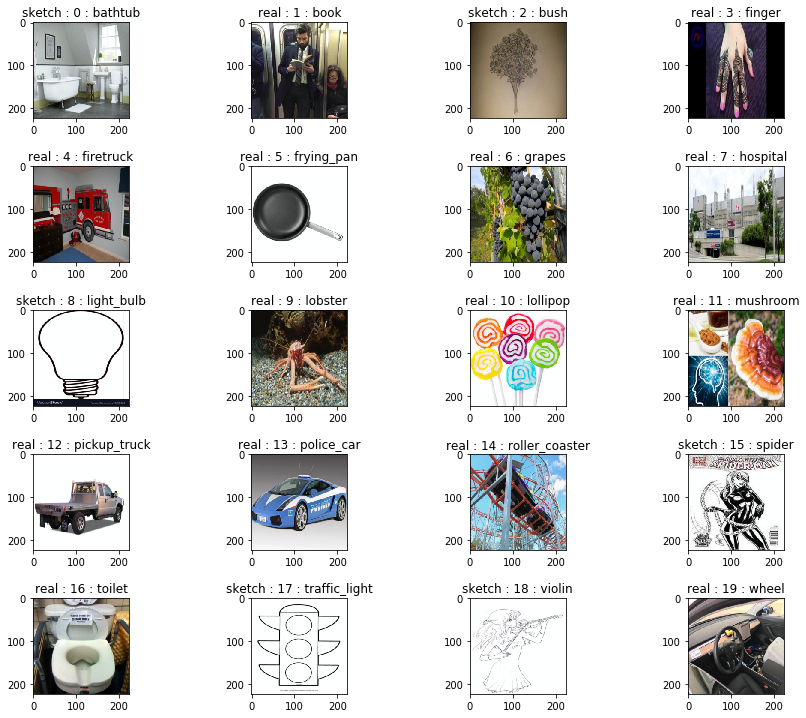

In [20]:
fig = plt.figure(figsize=(15, 15))

plt.subplots_adjust(hspace=0.5)

for label, english in enumerate(labels.values()):
  index = source_train_dataset.get_random_sample_index(label)
  img, _, domain = source_train_dataset[index]
  ax1 = fig.add_subplot(num_labels/4+1, 4, label+1)
  plt.title("{0} : {1} : {2}".format(source[domain - 1], label, english))
  ax1.imshow(tensor_to_PIL(img, *norm))

plt.show()

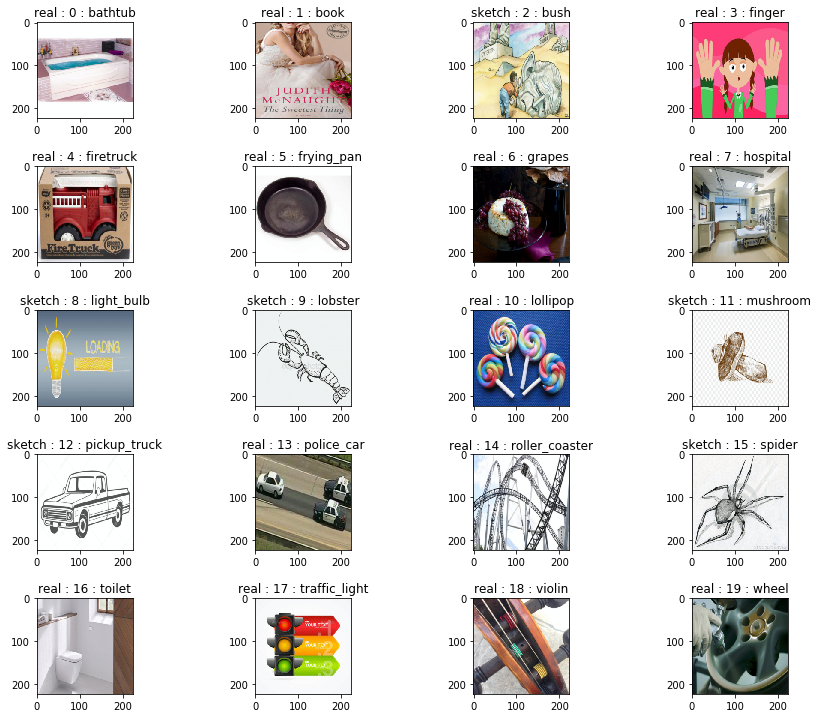

In [21]:
fig = plt.figure(figsize=(15, 15))

plt.subplots_adjust(hspace=0.5)

for label, english in enumerate(labels.values()):
  index = source_test_dataset.get_random_sample_index(label)
  img, _, domain = source_test_dataset[index]
  ax1 = fig.add_subplot(num_labels/4+1, 4, label+1)
  plt.title("{0} : {1} : {2}".format(source[domain - 1], label, english))
  ax1.imshow(tensor_to_PIL(img, *norm))

plt.show()

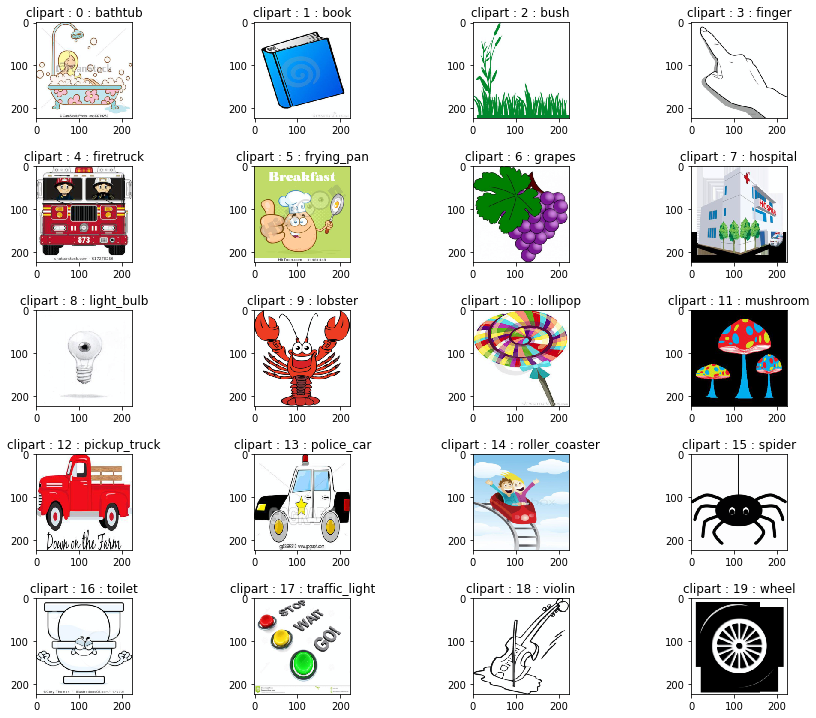

In [22]:
fig = plt.figure(figsize=(15, 15))

plt.subplots_adjust(hspace=0.5)

for label, english in enumerate(labels.values()):
  index = target_train_dataset.get_random_sample_index(label)
  img, _, domain = target_train_dataset[index]
  ax1 = fig.add_subplot(num_labels/4+1, 4, label+1)
  plt.title("{0} : {1} : {2}".format(target[domain], label, english))
  ax1.imshow(tensor_to_PIL(img, *norm))

plt.show()

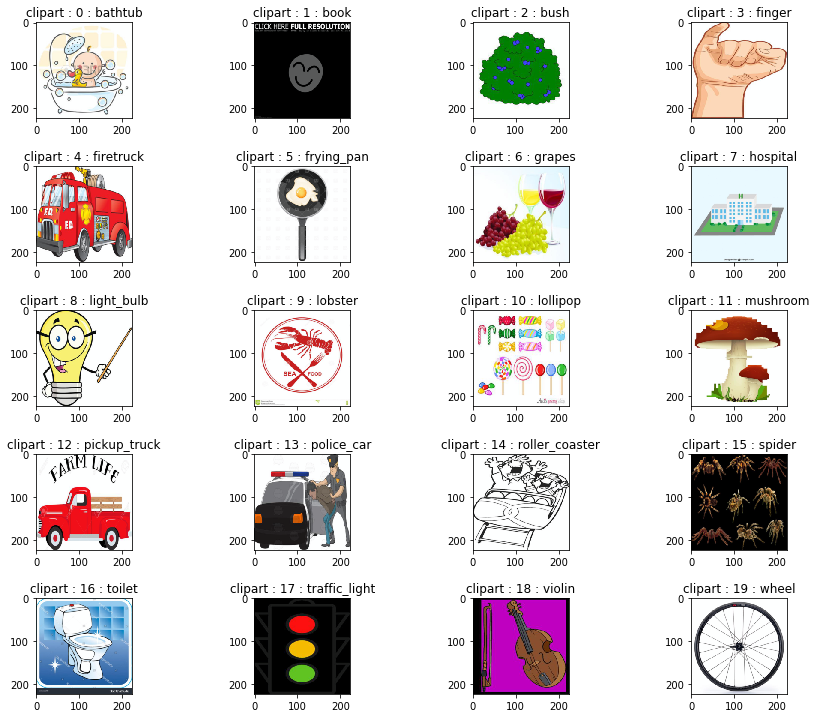

In [23]:
fig = plt.figure(figsize=(15, 15))

plt.subplots_adjust(hspace=0.5)

for label, english in enumerate(labels.values()):
  index = target_test_dataset.get_random_sample_index(label)
  img, _, domain = target_test_dataset[index]
  ax1 = fig.add_subplot(num_labels/4+1, 4, label+1)
  plt.title("{0} : {1} : {2}".format(target[domain], label, english))
  ax1.imshow(tensor_to_PIL(img, *norm))

plt.show()

# DANN Model

In [0]:
class ReverseLayerF(Function):

    @staticmethod
    def forward(ctx, x, alpha):
        # Store context for backward propagation
        ctx.alpha = alpha

        # Do nothing in forward pass
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        # Baskward pass is just to reverse (-alpha) the gradient
        output = grad_output.neg() * ctx.alpha

        # Must return same number as inputs to forward()
        return output, None

In [0]:
debug = False

class DANN(nn.Module):
    def __init__(self, num_labels, num_source_domains):
        super(DANN, self).__init__()

        # Download pre-trained ResNet50
        resnet = models.resnet50(pretrained = True)

        ### Feature learning
        # Base layers
        self.conv1 = resnet.conv1
        self.bn1 = resnet.bn1
        # ResNet layers
        self.res1 = resnet.layer1
        self.res2 = resnet.layer2
        self.res3 = resnet.layer3
        self.res4 = resnet.layer4
        # Average Pool
        self.avgpool = resnet.avgpool

        ### Class classifier
        self.class_fc1 = nn.Linear(2048, 100)
        self.class_bn1 = nn.BatchNorm1d(100)
        self.class_fc2 = nn.Linear(100, num_labels)

        ### Domain classifier
        self.domain_fc1 = nn.Linear(2048, 100)
        self.domain_bn1 = nn.BatchNorm1d(100)
        self.domain_fc2 = nn.Linear(100, num_source_domains + 1)
        
    def forward(self, x, alpha=1.0):
        ### Feature learning
        # Base layer
        if debug: print("--START ENCODING")
        if debug: print("Input shape: {0}".format(x.shape))
        feature = self.conv1(x)
        if debug: print("After conv1: {0}".format(feature.shape))
        feature = self.bn1(feature)
        if debug: print("After bn1: {0}".format(feature.shape))
        feature = F.relu(feature)
        feature = F.max_pool2d(feature, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        if debug: print("After base layer: {0}".format(feature.shape))
        # ResNet layers
        feature = self.res1(feature)
        if debug: print("After res1: {0}".format(feature.shape))
        feature = self.res2(feature)
        if debug: print("After res2: {0}".format(feature.shape))
        feature = self.res3(feature)
        if debug: print("After res3: {0}".format(feature.shape))
        feature = self.res4(feature)
        if debug: print("After res4: {0}".format(feature.shape))
        feature = self.avgpool(feature)
        if debug: print("After AdaptiveAvgPool: {0}".format(feature.shape))
        feature = torch.flatten(feature, 1)
        if debug: print("Final feature: {0}".format(feature.shape))

        ### Class classifier
        class_output = self.class_fc1(feature)
        if debug: print("After fc1: {0}".format(class_output.shape))
        class_output = self.class_bn1(class_output)
        if debug: print("After bn1: {0}".format(class_output.shape))
        class_output = F.relu(class_output)
        class_output = self.class_fc2(class_output)
        if debug: print("After fc2: {0}".format(class_output.shape))
        class_output = F.log_softmax(class_output, dim=1)
        if debug: print("Final class classifier: {0}".format(class_output.shape))

        ### Domain classifier
        # Gradient reversal layer
        reverse_feature = ReverseLayerF.apply(feature, alpha)
        domain_output = self.domain_fc1(reverse_feature)
        if debug: print("After fc1: {0}".format(domain_output.shape))
        domain_output = self.domain_bn1(domain_output)
        if debug: print("After bn1: {0}".format(domain_output.shape))
        domain_output = F.relu(domain_output)
        domain_output = self.domain_fc2(domain_output)
        if debug: print("After fc2: {0}".format(domain_output.shape))
        domain_output = F.log_softmax(domain_output, dim=1)
        if debug: print("Final domain classifier: {0}".format(domain_output.shape))

        return class_output, domain_output

In [0]:
# Initialie model
model = DANN(num_labels, num_source_domains)

In [27]:
# Check
x0_s, y0_s, d0_s = next(iter(source_train_dataloader))
x0_t, y0_t, d0_t = next(iter(target_train_dataloader))

print('source domain: ', x0_s.shape, y0_s.shape, d0_s)
print('target domain: ', x0_t.shape, y0_t.shape, d0_t)

model(x0_s)
model(x0_t)

source domain:  torch.Size([56, 3, 224, 224]) torch.Size([56]) tensor([1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2,
        1, 2, 1, 2, 1, 1, 1, 1])
target domain:  torch.Size([56, 3, 224, 224]) torch.Size([56]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


(tensor([[-3.0363, -3.5486, -2.7487,  ..., -3.3682, -2.9356, -2.5895],
         [-3.6703, -3.1415, -2.9506,  ..., -2.7872, -2.7747, -3.4526],
         [-3.0103, -3.1979, -2.6595,  ..., -2.8634, -2.8569, -2.8149],
         ...,
         [-3.5731, -3.9107, -2.0468,  ..., -3.1920, -2.8603, -2.8662],
         [-3.8408, -3.4269, -2.8328,  ..., -2.4692, -3.3450, -2.3053],
         [-3.7469, -3.0095, -3.4684,  ..., -2.7433, -3.3239, -2.6738]],
        grad_fn=<LogSoftmaxBackward>), tensor([[-0.8709, -1.6797, -0.9289],
         [-1.4282, -0.8161, -1.1454],
         [-1.1777, -1.0091, -1.1164],
         [-1.0989, -1.0631, -1.1351],
         [-1.3278, -1.1328, -0.8848],
         [-0.8280, -1.5806, -1.0294],
         [-0.9886, -1.4447, -0.9363],
         [-0.9591, -1.5070, -0.9284],
         [-1.1427, -2.1214, -0.5777],
         [-1.0446, -1.5603, -0.8253],
         [-1.3927, -1.2471, -0.7673],
         [-1.3610, -1.2045, -0.8125],
         [-1.4305, -0.8552, -1.0918],
         [-1.2903, -1.2052,

# Optimizer

In [0]:
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 0.001)

loss_class = torch.nn.NLLLoss()
loss_domain = torch.nn.NLLLoss()

if USE_GPU:
    model = model.cuda()
    loss_class = loss_class.cuda()
    loss_domain = loss_domain.cuda()

for p in model.parameters():
    p.requires_grad = True

# Training

In [29]:
n_epoch = 10

# Train the same number of batches from both source and target
max_batches = min(len(source_train_dataloader), len(target_train_dataloader))

# Train
for epoch_idx in range(n_epoch):
    print("Epoch {0} / {1}".format(epoch_idx + 1, n_epoch))
    
    source_data_iter = iter(source_train_dataloader)
    target_data_iter = iter(target_train_dataloader)

    for batch_idx in range(max_batches):
        # Reset optimizer's gradients
        optimizer.zero_grad()
        
        # Training progress
        p = float(batch_idx + epoch_idx * max_batches) / (n_epoch * max_batches)

        # Alpha for this batch
        alpha = 2. / (1. + np.exp(-10 * p)) - 1

        ### Source

        # Get source images, labels and domains
        s_img, s_label, s_domain = next(source_data_iter)

        if USE_GPU:
            s_img = s_img.cuda()
            s_label = s_label.cuda()
            s_domain = s_domain.cuda()

        # Forward pass
        label_pred, domain_pred = model(s_img, alpha)

        # Compute losses
        loss_s_label = loss_class(label_pred, s_label)
        loss_s_domain = loss_domain(domain_pred, s_domain)

        ### Target

        # Training on target domain
        # We don't compute the loss on label predictions
        t_img, _ , t_domain = next(target_data_iter)

        if USE_GPU:
            t_img = t_img.cuda()
            t_domain = t_domain.cuda()

        # Forward pass
        _, domain_pred = model(t_img, alpha)

        # Compute loss
        loss_t_domain = loss_domain(domain_pred, t_domain)

        ### Combined
        loss = loss_s_label + loss_s_domain + loss_t_domain

        # Backward pass
        loss.backward()
        optimizer.step()

        print ("\r",'[%d / %d], loss_s_label: %04.4f, loss_s_domain: %04.4f, loss_t_domain: %04.4f, alpha: %04.4f' \
              % (batch_idx + 1, max_batches, loss_s_label.data.cpu().numpy(),
                 loss_s_domain.data.cpu().numpy(), loss_t_domain.data.cpu().numpy(),
                 alpha),end="")
        
    print(' ')
    
    # torch.save({'state_dict': model.state_dict()}, '{0}/model_{1}.pth'.format(model_root, epoch_idx))

    # test(source_dataset_name, epoch)
    # test(target_dataset_name, epoch)

print('done')

Epoch 1 / 10
 [33 / 33], loss_s_label: 1.8325, loss_s_domain: 1.8738, loss_t_domain: 0.7124, alpha: 0.4501 
Epoch 2 / 10
 [33 / 33], loss_s_label: 1.9708, loss_s_domain: 1.6545, loss_t_domain: 0.7028, alpha: 0.7552 
Epoch 3 / 10
 [33 / 33], loss_s_label: 1.2385, loss_s_domain: 1.3682, loss_t_domain: 0.7260, alpha: 0.9024 
Epoch 4 / 10
 [33 / 33], loss_s_label: 1.6397, loss_s_domain: 1.5081, loss_t_domain: 0.7620, alpha: 0.9629 
Epoch 5 / 10
 [33 / 33], loss_s_label: 1.1476, loss_s_domain: 1.3434, loss_t_domain: 0.7184, alpha: 0.9862 
Epoch 6 / 10
 [33 / 33], loss_s_label: 1.3875, loss_s_domain: 1.5374, loss_t_domain: 0.7300, alpha: 0.9949 
Epoch 7 / 10
 [33 / 33], loss_s_label: 1.3262, loss_s_domain: 1.3578, loss_t_domain: 0.7197, alpha: 0.9981 
Epoch 8 / 10
 [33 / 33], loss_s_label: 0.9660, loss_s_domain: 1.4412, loss_t_domain: 0.7074, alpha: 0.9993 
Epoch 9 / 10
 [33 / 33], loss_s_label: 1.0847, loss_s_domain: 1.4641, loss_t_domain: 0.7244, alpha: 0.9997 
Epoch 10 / 10
 [33 / 33], lo

## Evaluation

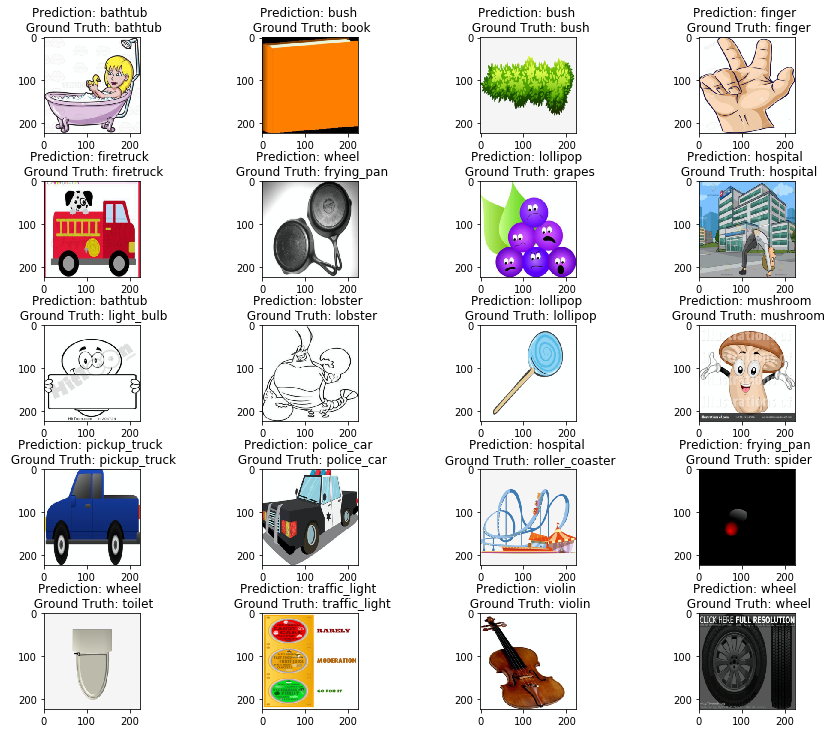

In [30]:
# Change to evaluation mode
model = model.eval()

fig = plt.figure(figsize=(15, 15))

plt.subplots_adjust(hspace=0.5)

for label, english in enumerate(labels.values()):
  index = target_test_dataset.get_random_sample_index(label)
  img, _, domain = target_test_dataset[index]
  if USE_GPU:
      img = img.cuda()
      model = model.cuda()

  output = model.forward(img[None])[0]

  prediction = int(torch.argmax(output).cpu().numpy())

  ax1 = fig.add_subplot(num_labels/4+1, 4, label+1)
  plt.title("Prediction: {0} \n Ground Truth: {1}".format(labels[prediction], labels[label]))
  ax1.imshow(tensor_to_PIL(img.cpu(), *norm))

plt.show()


Test set: Average loss: 0.0258, Accuracy: 1136/1825 (62%)



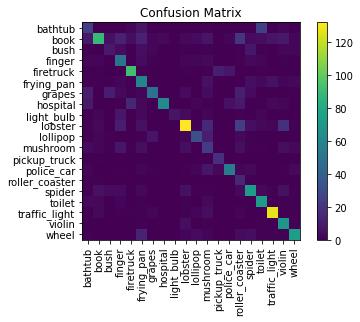

0.6224657534246575

In [31]:
validate(target_train_dataloader, model)